In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

In [2]:
table=pd.read_csv('data/FishDataRefined.csv')

,Year,Plastic,Pollution,Sharks
0,1970,249000000,8560.4706,1.59
1,1971,287000000,9866.8878,1.63
2,1972,331000000,11379.5814,1.74
3,1973,382000000,13132.9308,1.41
4,1974,434000000,14920.6596,1.56
5,1975,480000000,16502.1120,1.57
6,1976,534000000,18358.5996,1.78
7,1977,593000000,20386.9842,2.35
8,1978,657000000,22587.2658,1.41
9,1979,728000000,25028.2032,1.17


In [3]:
year=table.Year

0     1970
1     1971
2     1972
3     1973
4     1974
5     1975
6     1976
7     1977
8     1978
9     1979
10    1980
11    1981
12    1982
13    1983
14    1984
15    1985
16    1986
17    1987
18    1988
19    1989
20    1990
21    1991
22    1992
23    1993
24    1994
25    1995
26    1996
27    1997
28    1998
29    1999
30    2000
31    2001
32    2002
Name: Year, dtype: int64

In [4]:
pollution=table.Pollution

0       8560.4706
1       9866.8878
2      11379.5814
3      13132.9308
4      14920.6596
5      16502.1120
6      18358.5996
7      20386.9842
8      22587.2658
9      25028.2032
10     27434.7612
11     29910.0780
12     32419.7742
13     35170.1262
14     38126.7546
15     41220.9006
16     44521.3230
17     48096.7806
18     51878.5146
19     55797.7662
20     59923.2942
21     64186.3398
22     68724.4206
23     73434.3984
24     78625.6878
25     83988.8742
26     89764.6134
27     95952.9054
28    102416.2326
29    109360.8714
30    116683.6836
31    124178.3928
32    132120.0342
Name: Pollution, dtype: float64

In [5]:
sharks=table.Sharks

0     1.59
1     1.63
2     1.74
3     1.41
4     1.56
5     1.57
6     1.78
7     2.35
8     1.41
9     1.17
10    1.32
11    1.62
12    1.14
13    1.01
14    0.99
15    1.29
16    1.27
17    0.99
18    1.16
19    1.01
20    0.93
21    1.03
22    1.10
23    0.89
24    1.09
25    0.84
26    0.92
27    0.86
28    0.95
29    0.88
30    0.84
31    0.95
32    0.95
Name: Sharks, dtype: float64

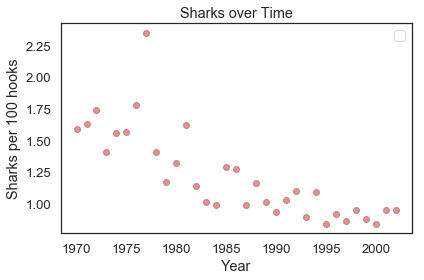

In [6]:
plot(year,sharks,"ro")

decorate(xlabel='Year', 
             ylabel='Sharks per 100 hooks',
             title='Sharks over Time')


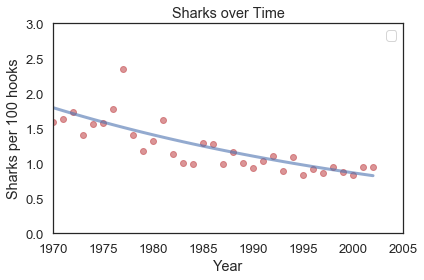

In [7]:
#sharkModelInv=10/(year-1970)+.5
sharkModelExp=1.795*exp(-0.02435*((year-1970)))
plot(year,sharks,"ro")
#plot(year,sharkModelInv)
plot(year,sharkModelExp)
decorate(xlabel='Year', 
             ylabel='Sharks per 100 hooks',
             title='Sharks over Time',xlim=[1970,2005],ylim=[0,3])

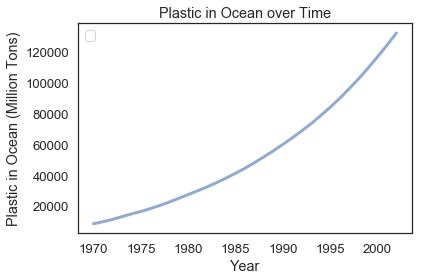

In [8]:
plot (year,pollution)
decorate(xlabel='Year', 
             ylabel='Plastic in Ocean (Million Tons)',
             title='Plastic in Ocean over Time')

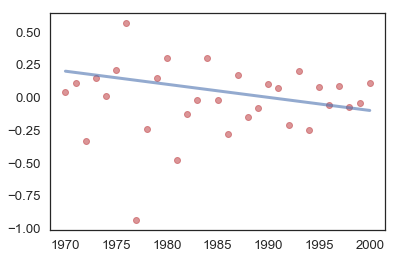

In [9]:
def rate_finder(data):
    rate=[]
    for i in linrange(1, 32, 1):
        rate.append(data[i]-data[i-1])
    return rate
pollutionRate=rate_finder(pollution)
sharkRate=rate_finder(sharks)
plot(table.Year[0:31],sharkRate, "ro")
sharkRateReg=(-.01*(table.Year-1970)+.2)  #This is the rate at which shark population grows per year with current plastic changes

## alternate equation is -29747643494751453184 e^(-0.02435 x) which is derivative of original function and seems to fit data better


plot(table.Year[0:31],sharkRateReg[0:31])

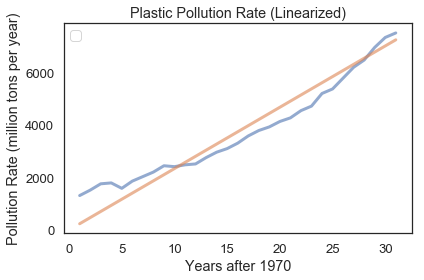

In [10]:
plot(linrange(1, 32, 1),pollutionRate)
pollutionRateLin=(7000/30)*(linrange(1, 32, 1))
plot(linrange(1, 32, 1),pollutionRateLin)
sharkRateLin=1.795*exp(-0.02435*((linrange(1, 32, 1)-1970)))

decorate(xlabel='Years after 1970', 
             ylabel='Pollution Rate (million tons per year)',
             title='Plastic Pollution Rate (Linearized)')

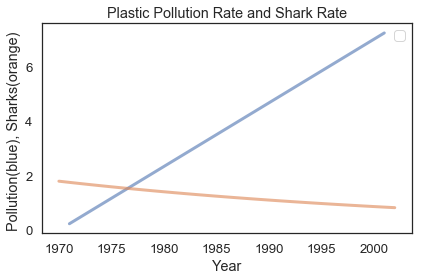

In [11]:
sharkRateLin=1.795*exp(-0.02435*((linrange(1, 32, 1)-1970)))
pollutionRateLin=(7000/30)*(linrange(1, 32, 1))
plot((linrange(1, 32, 1)+1970),pollutionRateLin/1000)
plot(year,sharkModelExp)
decorate(xlabel='Year', 
             ylabel='Pollution(blue), Sharks(orange) ',
             title='Plastic Pollution Rate and Shark Rate')

In [12]:
sharkPerPlastic=pollutionRateLin/sharkRateLin

array([1.95703347e-19, 4.01054432e-19, 6.16409963e-19, 8.42138372e-19,
       1.07862018e-18, 1.32624835e-18, 1.58542871e-18, 1.85658029e-18,
       2.14013578e-18, 2.43654193e-18, 2.74625996e-18, 3.06976603e-18,
       3.40755170e-18, 3.76012435e-18, 4.12800772e-18, 4.51174240e-18,
       4.91188630e-18, 5.32901520e-18, 5.76372333e-18, 6.21662386e-18,
       6.68834953e-18, 7.17955319e-18, 7.69090848e-18, 8.22311038e-18,
       8.77687589e-18, 9.35294471e-18, 9.95207990e-18, 1.05750686e-17,
       1.12227226e-17, 1.18958795e-17, 1.25954030e-17])

C:\Miniconda3\lib\site-packages\pandas\core\ops.py:1037: RuntimeWarning: divide by zero encountered in true_divide
  lambda x: op(x, rvalues))


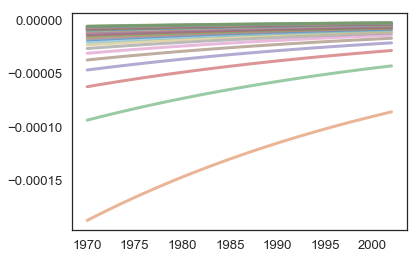

In [13]:
#plot( table.Year,-29747643494751453184 *exp(-0.02435 *table.Year))
#plot(table.Year, 700/3*(table.Year-1970))
sharkRatePerPlastic=(-29747643494751453184 *exp(-0.02435 *table.Year))/(700/3*(table.Year-1970))



plot(table.Year,(-29747643494751453184 *exp(-0.02435 *table.Year))/(700/3*(table.Year-1970)) )

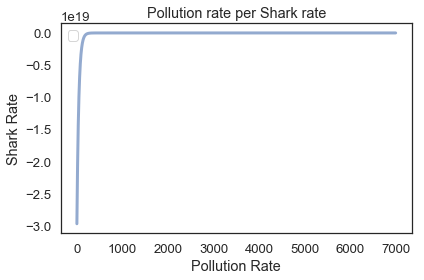

In [14]:
#sharkPerPlastic=pollutionRateLin/sharkRateLin
#plot(pollutionRateLin,sharkRateLin)
sharkPerPlasticExp=-29747643494751453184 *exp(-0.02435 *linrange(0,7000,1))
plot(linrange(0,7000,1),sharkPerPlasticExp)
decorate(xlabel='Pollution Rate', 
             ylabel='Shark Rate',
             title='Pollution rate per Shark rate')

Modelling the rate of shark reproduction and pollution relates shark populations to current pollution levels with 1.222e+21*exp(-0.0001044*(Time))

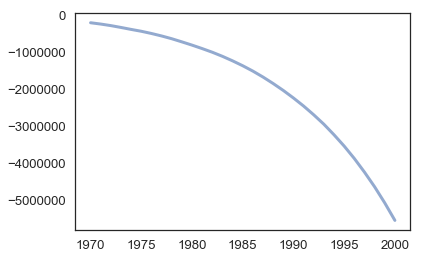

In [15]:
sharkRateReg2=-29747643494751453184 *exp(-0.02435 *table.Year)

plot(year[0:31],(pollution/sharkRateReg2)[0:31])



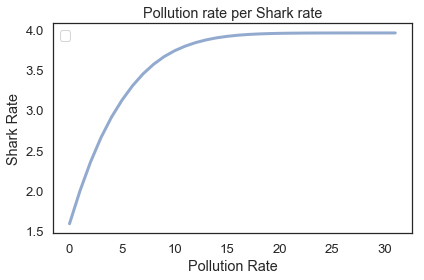

In [16]:
system=System(t_0=0, t_end=31, p_0=1.59)
pop=0
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

def update_func_sharks(pop, t, system):
    """Compute the population next year with a quadratic model.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year

    """
    
    sharkPerPlasticExp =exp(-0.0001044*(table.Pollution[t]))
    return pop + sharkPerPlasticExp

results=run_simulation(system,update_func_sharks)


plot(results)
decorate(xlabel='Pollution Rate', 
             ylabel='Shark Rate',
             title='Pollution rate per Shark rate')

In [17]:
#sharkPerPlastic=pollutionRateLin/sharkRateLin
#plot(linrange(1, 32, 1)+1970,sharkPerPlastic)
#sharkPerPlasticLinearized=8.24e-19*exp(0.09238*((year-1970)))
#plot(year,sharkPerPlasticLinearized)
#decorate(xlabel='Year', 
 #            ylabel='pollutiuon rate per shark rate',
  #           title='Pollution rate and Shark rate over time')

### Where Code Makes More Sense


Find a function for the amount of sharks over time

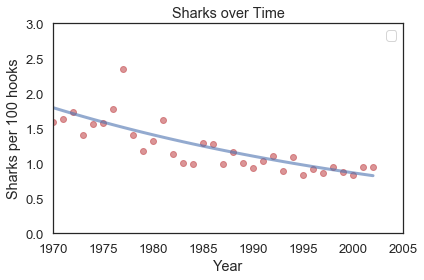

In [18]:
#sharkModelInv=10/(year-1970)+.5         #Plot sharks over time and find a regression of it
sharkModelExp=1.795*exp(-0.02435*((year-1970)))
plot(year,sharks,"ro")
#plot(year,sharkModelInv)
plot(year,sharkModelExp)
decorate(xlabel='Year', 
             ylabel='Sharks per 100 hooks',
             title='Sharks over Time',xlim=[1970,2005],ylim=[0,3])

Find yearly rate of sharks/year^2 and graph it for all years

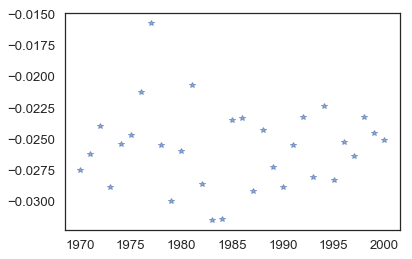

In [19]:
sharkRateReg2=-29747643494751453184 *exp(-0.02435 *table.Year)   #The derivative of the regression equation for sharks
plot(year[0:31],(sharkRateReg2/sharks)[0:31],'*' ) #Find the rate of shark reproduction per shark, aka growth rate

Plot the rate of pollution and a linear regression line for it

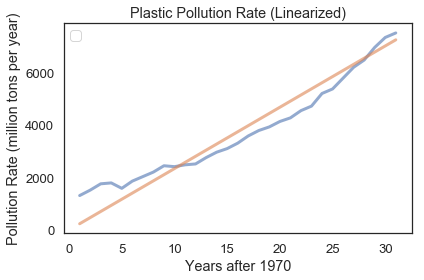

In [20]:
plot(linrange(1, 32, 1),pollutionRate)     #Plot pollution rate and find a fit function for it
pollutionRateLin=(7000/30)*(linrange(1, 32, 1))
plot(linrange(1, 32, 1),pollutionRateLin)
sharkRateLin=1.795*exp(-0.02435*((linrange(1, 32, 1)-1970)))

decorate(xlabel='Years after 1970', 
             ylabel='Pollution Rate (million tons per year)',
             title='Plastic Pollution Rate (Linearized)')

Plot Sharks/Year^2 and Pollution rate on same axes to show correlations, especially in years like 1973 and 1975

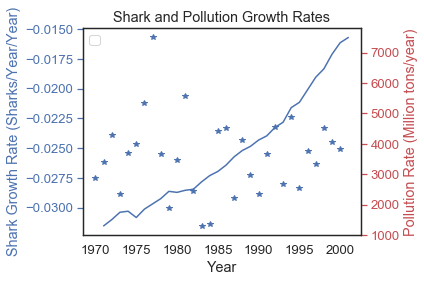

In [21]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
ax1.plot(year[0:31],(sharkRateReg2/sharks)[0:31],'*' )
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Shark Growth Rate (Sharks/Year/Year)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
#s2 = np.sin(2 * np.pi * t)
ax2.plot(1970+linrange(1, 32, 1),pollutionRate)
ax2.set_ylabel('Pollution Rate (Million tons/year)', color='r')
ax2.tick_params('y', colors='r')

decorate(title='Shark and Pollution Growth Rates')

fig.tight_layout()
plt.show()

There is some data to suggest that these two sets are correlated, but not enough to proove this correlation. Therefore, assuming the correlation is its most severe, we will model what will happen to sharks. Below is labelled a "worst case" correlation where the most extreme data was taken to be the mean.

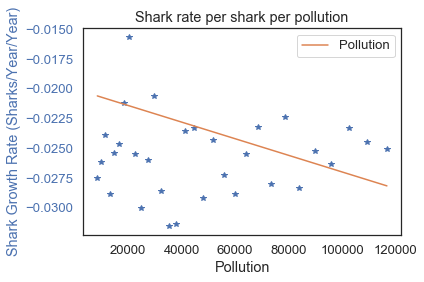

In [43]:
fig, ax1 = plt.subplots()
#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
ax1.plot(pollution[0:31],(sharkRateReg2/sharks)[0:31],'*' )
ax1.set_xlabel('Pollution')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Shark Growth Rate (Sharks/Year/Year)', color='b')
ax1.tick_params('y', colors='b')

#ax2 = ax1.twinx()
#s2 = np.sin(2 * np.pi * t)
ax1.plot(pollution[0:31],-.00000007*pollution[0:31]-.02)  #This is the final equation relating pollution to shark rates that can be put into the probability function.
#ax2.set_ylabel('Pollution Rate (Million tons/year)', color='r')
#ax2.tick_params('y', colors='r')

decorate(title='Shark rate per shark per pollution')

fig.tight_layout()
plt.show()

In [23]:
type (pollution)

pandas.core.series.Series